In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.contrib.factorization.python.ops import gmm as gmm_lib
from tensorflow.contrib.learn.python.learn.estimators import run_config

In [136]:
df = pd.read_csv("/Users/oliver/Dropbox/EDU/DTU/Bachelorprojekt Blockchain/Blockchain-Transaction-Classification/subset_sub500k1.csv", sep = ";")
df

,Unnamed: 0,userID,value_in,nr_address,value_out,value_net
0,234202,338905.0,"1104882393,00",02.00,104892393.0,999990000.0
1,184296,265188.0,"300000,00",03.00,200001.0,99999.0
2,64394,90780.0,"108226772,00",02.00,98227566.0,9999206.0
3,8344,11857.0,"249980000,00",05.00,149990000.0,99990000.0
4,231365,334728.0,"379980000,00",02.00,279990000.0,99990000.0
5,226322,327284.0,"227232,00",02.00,127242.0,99990.0
6,239510,346745.0,"4067920638,00",02.00,3068090638.0,999830000.0
7,272210,395146.0,"6001913903,00",02.00,5002100000.0,999813903.0
8,181274,260708.0,"99990000,00",02.00,10000.0,99980000.0
9,257479,373329.0,"1998800,00",02.00,999400.0,999400.0


In [134]:
df = df.drop(["Unnamed: 0","userID","value_net"],axis = 1)
df = df.drop(19) # drop row 19 (outlier)
df

ValueError: labels ['Unnamed: 0' 'userID' 'value_net'] not contained in axis

In [128]:
df = np.array(df[1:50000]) #subset
df = tf.keras.utils.normalize(df) #normalize

In [121]:
df

array([[4.05299144e-01, 6.51254407e-11, 9.14184119e-01],
       [7.07106781e-01, 1.27360731e-07, 7.07106781e-01],
       [7.07106781e-01, 7.89282549e-09, 7.07106781e-01],
       ...,
       [7.07106781e-01, 3.74592570e-07, 7.07106781e-01],
       [7.07106781e-01, 3.00460171e-08, 7.07106781e-01],
       [7.07106781e-01, 7.16238826e-06, 7.07106781e-01]])

In [122]:
x = np.transpose(df) #transpose

# GMM with tensorflow 

In [65]:
iterations = 200  # that should be enough to know whether this diverges
np.random.seed(5)
num_classes = 5

In [66]:
# skflow version.
gmm = gmm_lib.GMM(num_classes,
                  covariance_type='full',
                  config=run_config.RunConfig(tf_random_seed=2))

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x111107358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 2, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/bk/zr49ky7x41jdyy4k9bjjcnbh0000gn/T/tmpgrbk_022'}


In [67]:
def get_input_fn(x):
  def input_fn():
    return constant_op.constant(x.astype(np.float32)), None
  return input_fn

In [68]:
gmm.fit(input_fn=get_input_fn(x), steps=iterations)
#self.assertFalse(np.isnan(gmm.clusters()).any())

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/bk/zr49ky7x41jdyy4k9bjjcnbh0000gn/T/tmpgrbk_022/model.ckpt.
INFO:tensorflow:loss = 6.6469164, step = 1
INFO:tensorflow:global_step/sec: 10.0495
INFO:tensorflow:loss = 6.0341864, step = 101 (9.952 sec)
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/bk/zr49ky7x41jdyy4k9bjjcnbh0000gn/T/tmpgrbk_022/model.ckpt.
INFO:tensorflow:Loss for final step: 6.0341864.


GMM(params=None)

In [200]:
clusters = gmm.clusters()

# PCA

In [99]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [123]:
pca = PCA(n_components = 2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(df)
print(df.data.shape)
print(projected.shape)

(49999, 3)
(49999, 2)


In [124]:
print(pca.explained_variance_ratio_)  

[0.97677591 0.02028261]


In [125]:
#X = pca.transform(df)

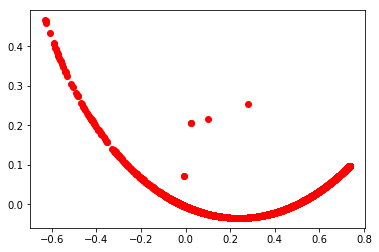

In [126]:
plt.plot(projected[:,0],projected[:,1], 'ro')
#plt.axis([0, 6, 0, ])
plt.show()

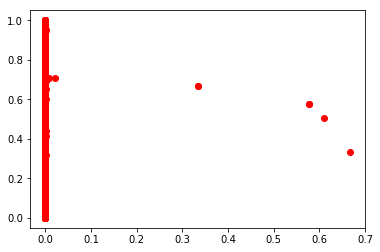

In [130]:
plt.plot(df[:,1],df[:,2], 'ro')
#plt.axis([0, 6, 0, ])
plt.show()

In [178]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [163]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

In [164]:
ax.scatter(X[:, 0], X[:, 1],X[:,2])
plt.show()

In [30]:
len(x)

6

In [86]:
df

array([[ 5.80422225e-11,  1.52070623e-08,  3.61217718e-01,
         5.80422225e-11,  8.14754994e-01, -4.53537276e-01],
       [ 2.54721463e-07,  3.54062833e-05,  7.07106781e-01,
         1.27360731e-07,  7.07106781e-01,  0.00000000e+00],
       [ 4.73569529e-09,  4.43576792e-07,  7.07106781e-01,
         7.89282549e-09,  7.07106781e-01,  0.00000000e+00],
       ...,
       [ 3.61204567e-05,  8.95380334e-05,  7.07106778e-01,
         7.26769752e-08,  7.07106778e-01,  0.00000000e+00],
       [ 2.31588832e-06,  5.73391626e-06,  7.07106781e-01,
         4.65037815e-09,  7.07106781e-01,  0.00000000e+00],
       [ 3.52846128e-04,  8.72569381e-04,  7.07106468e-01,
         7.07106468e-07,  7.07106468e-01,  0.00000000e+00]])